In [2]:
import astropy.units as u
from astropy.table import QTable, Table, Column
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np 
from sklearn.neighbors import NearestNeighbors
import pandas as pd

#input: SODA Catalogue
#Data=[]
from google.colab import drive #Mounting google drive. Insert confirmation code.
drive.mount('/content/drive') 
Data = np.loadtxt('/content/drive/My Drive/New_version_SODA')
#print(Data,np.shape(Data))


#Input: VISION Catalogue --> I need to find the SODA's objects in the VISION Catalogue
Data2=[] #creating second Dataset where we want to measure the distances to the stars within 
file= open('/content/drive/My Drive/VISION_ONLY_RA_DEC', 'r') #reading out second data set
for i, line in enumerate(file.readlines()):
    if i==0:
        continue
    line = line.split()
    line[0]=float(line[0])
    line[1]=float(line[1])
    Data2.append(line[0:2])
    file.close()

#print(type(Data),np.shape(Data),np.shape(Data[0]),type(Data[0]),np.shape(Data[0][0]),Data[0],Data[0][0],Data[0][1])
#Data2_array=np.array(Data2)
#print(type(Data[0]),np.shape(Data[0]),Data[0],type(Data),np.shape(Data),Data)


#Let's use the command match_coordinates_sky() to find SODA objects in VISION catalog
#Command explanation -> Finds the nearest on-sky matches of a coordinate or coordinates in a set of catalog coordinates.
#The closest neighbor is only different from the 3-dimensional match if distance is set in either matchcoord (in our case Data, i.e. SODA) or catalogcoord (VISION). NOT OUR CASE
#1st attribute (c)=The coordinate(s) to match to the catalog; 2nd (catalog)=The base catalog in which to search for matches; 3rd (nthneighbor)=closest neighbor to search for, typically 1
#This command returns 3 outputs: idx=indices into catalog (VISION) that are the closest objects to each of the coordinates in SODA; 
#d2d=on-sky distances between them; d3d=3-dimensional distances

Data2=np.array(Data2)

#catalog = np.array([SkyCoord(ra=Data2[i][0]*u.degree, dec=Data2[i][1]*u.degree) for i in range(Data2.shape[0])])
Vision = SkyCoord(ra = Data2[:,0]*u.degree,dec = Data2[:,1]*u.degree)
#print(len(catalog),catalog)
Soda = SkyCoord(ra = Data[:,0]*u.degree,dec = Data[:,1]*u.degree)
idx, d2d, d3d = match_coordinates_sky(Soda, Vision)
#print(len(Soda),len(idx))
print(idx, d2d)


#threshold: I discard matches for which I have a distance greater than 1 arcsec
indices = idx[np.where(d2d<1.5*u.arcsec)]
indices_list = indices.tolist()
NewVis = Vision[indices]

#print("Prova", NewVis.ra.value)

#print(indices, len(indices), type(indices_list))
#print(np.shape(NewVis),type(NewVis))
#print(NewVis)
#print(NewVis.ra*u.degree,NewVis.ra[0],NewVis.ra[0]*u.degree)

#Create a table (in this way it's easier to use/control the data)
#Information I need is: index of the star SODA which actually has a match in VISION, index of this match in VISION, object co-ordinates (RA,DEC)

#I already have all the information except the index (i.e. the position) in SODA of the actually matched star 
Soda_idx=np.empty(828, dtype=object) #In this array I store the SODA indices of the stars actually matched
c=0 #counter
for i in range(len(idx)):
  for j in range(len(indices)):
    if idx[i]==indices[j]:
      Soda_idx[c]=i
      c=c+1
Soda_idx_list = Soda_idx.tolist()
#print(Soda_idx, len(Soda_idx))

#Create a table with Astropy
print("Table containing all Soda stars that have a true match (d < 1.5'') in Vision")
r = Table()
r['Star index in SODA']=np.empty(828, dtype=int)
r['Star index in VISION']=np.empty(828, dtype=int)
r['RA [degree]']=np.empty(828, dtype=object)
r['DEC [degree]']=np.empty(828, dtype=object)
for i in range(0,828):
  r['Star index in SODA'][i]=Soda_idx[i]
  r['Star index in VISION'][i]=indices[i]
  r['RA [degree]'][i]=NewVis.ra[i].value
  r['DEC [degree]'][i]=NewVis.dec[i].value

print(r)
#r.write('Matched_star_SodaVision', format='votable')

'''
#I'm creating the .txt file in which I save the coordinates of the SODA objects that I have matched with VISION 
#(the coordinates shown are those of the object in the VISION catalogue)

count=0
with open("/content/drive/My Drive/NewVision_idx","w") as f:
    #for r,d in zip(NewVis.ra*u.degree, NewVis.dec*u.degree):
    for i,c,r,d in zip(Soda_idx_list,indices_list, NewVis.ra.value, NewVis.dec.value):
      #f.write(str(r)+"\t"+str(d)+"\n")
      f.write(str(Soda_idx_list[count])+"\t"+str(indices_list[count])+"\t"+str(r)+"\t"+str(d)+"\n")
      count=count+1
'''

Mounted at /content/drive
[2900 3060 2910 2933 3054 3055 3046 2930 2965 3024 3022 2854 2921 2893
 2886 2923 2894 2907 2831 2934 2947 3074 2928 2864 2866 2899 2883 2939
 3073 2911 2920 2867 2929 2927 2926 2952 2851 3045 2909 3017 3038 2835
 2683 2859 2948 3028 2941 2915 2975 2829 2875 2903 3066 3069 3056 3041
 2995 2830 2873 2972 2974 2985 3037 2806 2897 3034 2976 3088 2990 2999
 3015 3020 2791 3000 2969 2912 2675 2951 2988 2963 3002 2876 2725 2718
 3003 2624 2691 2620 2597 2794 2662 2800 2838 2692 2703 2663 2770 2802
 2724 2706 2720 2660 2661 2805 2688 2646 2772 2694 2605 2679 3076 2945
 2708 2967 2673 2610 2599 2636 2682 2700 2698 2697 2678 2808 2622 2595
 2707 2704 2676 2690 2938 2722 2877 2960 2959 2986 2839 2804 2668 2598
 2674 3098 2849 2803 2709 2716 3107 2748 2715 2714 2747 2764 3027 2656
 2752 2944 2581 2608 2922 2717 3031 2621 2650 2648 2642 2644 2664 2940
 2950 2956 2955 3097 3058 2699 2786 2832 3025 3059 2936 2798 2732 2799
 2946 2971 3030 3011 3021 2743 2746 3068 3007 3014 

'\n#I\'m creating the .txt file in which I save the coordinates of the SODA objects that I have matched with VISION \n#(the coordinates shown are those of the object in the VISION catalogue)\n\ncount=0\nwith open("/content/drive/My Drive/NewVision_idx","w") as f:\n    #for r,d in zip(NewVis.ra*u.degree, NewVis.dec*u.degree):\n    for i,c,r,d in zip(Soda_idx_list,indices_list, NewVis.ra.value, NewVis.dec.value):\n      #f.write(str(r)+"\t"+str(d)+"\n")\n      f.write(str(Soda_idx_list[count])+"\t"+str(indices_list[count])+"\t"+str(r)+"\t"+str(d)+"\n")\n      count=count+1\n'

In [3]:
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np #import necessary modules
from sklearn.neighbors import NearestNeighbors
from google.colab import drive #Mounting google drive. Insert confirmation code.
drive.mount('/content/drive') 
import astropy.units as u
from astropy.table import QTable, Table, Column
from astropy.coordinates import SkyCoord

Data=[] #Sources for which I want to find the closest companion 
file= open('/content/drive/My Drive/VISION_wholecat', 'r') #reading out second data set
for i, line in enumerate(file.readlines()):
    if i==0: 
        continue
    line = line.split()
    line[0]=float(line[0])
    line[1]=float(line[1])
    Data.append(line[0:2])
    file.close()

Data= np.array(Data) #reshape to an np.array so that it can be handled by sklearn 
#print(np.shape(Data), type(Data), Data)

Data2=[] #Background stars, i.e. catalogue in which we search for likely companions

#New_Vision_mm_onlyRADEC contiene le stesse stelle di NewVis_idx, nel quale sono però presenti anche i corrispondenti indici nei 2 cataloghi
file= open('/content/drive/My Drive/NewVision_mm_onlyRADEC', 'r') #readout first list of stars 
for i, line in enumerate(file.readlines()): #reshape data: 1st input is [RA,DEC] value in the 1st line, 2nd input is [RA,DEC] value in 2nd line...
    #if i==0:
    #    continue
    line = line.split() #split 
    line[0]=float(line[0]) #transform string into float number
    line[1]=float(line[1])
    Data2.append(line) #creating Dataset to use
    file.close()

Data2= np.array(Data2) #reshape to an np.array so that it can be handled by sklearn 
print(len(Data2))


dist=np.empty(828, dtype=object) #Empty array (size 828, i.e. the number of SODA stars matched in VISION) which I'll initialise with the R_0 in parsec
dist_AU=np.empty(828, dtype=object) #Empty array that will contain the R_0 in AU
neigh = NearestNeighbors(n_neighbors=2) #nearsest numbers of neighbors, can be changed anytime
neigh.fit(Data)
max_sep_AU=np.empty(190, dtype=object) #Empty array that will contain only the R_0 < 10^4 AU (i.e. max separation, arbitraly chosen)
conta=0
KNN_ind0 = np.empty(190, dtype=object) #Empty array that will only contain the indices in VISION of the central star (i.e. the Soda star match in vision), for pairs with R_0 < 10^4 AU
KNN_ind1 = np.empty(190, dtype=object) #Empty array that will only contain the indices in VISION of the nearest neighbor star, for pairs with R_0 < 10^4 AU
for j,i in enumerate(Data2): # for every star in 2nd Dataset find out (2) nearest neighbors
    print('Star {}'.format(j),neigh.kneighbors([i])) #output: Star number [distances of nN][indices of nN]
    distance=neigh.kneighbors([i])[0][0] #neigh.kneighbors([i]) is a tuple, I want only the 1st array, i.e. distances
    ind=neigh.kneighbors([i])[1][0] #neigh.kneighbors([i]) is a tuple, I want only the 2nd array, i.e. index of the nearest neighbor
    #distanza[1] = distance between the central star and its nearest neighborn
    #For now distanza[0] doesn't work, it rappresents the distance between the star and itself 
    #if distance[1]<0.000277778: #I only want pairs with d<1'' or 0.00027... degrees
    dist[j]=distance[1]*0.0174533*400 #distanza[1] is in degree, multiplying this value by 0.017.. we get radians, finally multiplying by 400 we get parsecs
    dist_AU[j]=dist[j]*206265 #dist[j] is in parsec. Multiplying this value by 206265 we get AU
    #Let us take 10^4 AU as the maximum separation between the two companions
    if dist_AU[j]<=1e4:
      max_sep_AU[conta]=dist_AU[j]
    #For each star, I need the index of the nearest neighbour printed by KNN
      KNN_ind0[conta]=ind[0]
      KNN_ind1[conta]=ind[1]
      conta=conta+1

#The following information is for the whole sample, i.e. I have not yet considered any restriction
#print(dist)
#print("R_0 min [parsec] = %le, R_0 max [parsec] = %le " % (dist.min(), dist.max()))
#print(dist_AU)
#print("R_0 min [AU] = %le, R_0 max [AU] = %le " % (dist_AU.min(), dist_AU.max()))

print("The follow information is only for pairs with separation < 10^4 AU")
print("Distances between the two stars [AU]: ", max_sep_AU)
print("Indices in VISION of the central star: ", KNN_ind0)
print("Indices in VISION of the nearest neighbor: ", KNN_ind1)
#print(len(max_sep_AU), len(KNN_ind0), len(KNN_ind1))

#Create a table with 3 columns: Index in Vision for the central star, Index in Vision for the nearest neighbor, distance between the two stars [AU]
#I can also add the index in Soda for the central obj, but in order to that I have to recreate the array which contain this info
t = Table()
t['Central obj index in VISION']=np.empty(190, dtype=int)
t['Nearest neigh index in VISION']=np.empty(190, dtype=int)
t['Separation [AU]']=np.empty(190, dtype=object)
for i in range(0,190):
  t['Central obj index in VISION'][i]=KNN_ind0[i]
  t['Nearest neigh index in VISION'][i]=KNN_ind1[i]
  t['Separation [AU]'][i]=max_sep_AU[i]

print(t)

print("DOING A QUICK CHECK ON PAIRS")
print(len(t), len(set(t['Separation [AU]'])))

#t.write('Possible_binary_systems', format='votable')

#Removing pairs counted twice
indx_del = [] #Empty list that will contain one of the two positions of the pairs counted twice
new_max_sep_AU=np.empty(130, dtype=object)
new_KNN_ind0=np.empty(130, dtype=object)
new_KNN_ind1=np.empty(130, dtype=object)

for i in range(len(KNN_ind1)):
  if (i in indx_del)==False:
    for j in range(len(KNN_ind0)):
      if KNN_ind1[i]==KNN_ind0[j] and KNN_ind1[j]==KNN_ind0[i]:
        indx_del.append(j)

print(indx_del)
print(len(indx_del))

new_max_sep_AU = np.delete(max_sep_AU, indx_del)
new_KNN_ind0 = np.delete(KNN_ind0, indx_del)
new_KNN_ind1 = np.delete(KNN_ind1, indx_del)

#print(new_max_sep_AU, len(new_max_sep_AU), type(new_max_sep_AU))

#Create a new table that is like the previous one but no longer counts equal pairs 
print("Table containing the final list of candidate binary systems")
f = Table()
f['Central obj index in VISION']=np.empty(130, dtype=int)
f['Nearest neigh index in VISION']=np.empty(130, dtype=int)
f['Separation [AU]']=np.empty(130, dtype=object)
for i in range(0,130):
  f['Central obj index in VISION'][i]=new_KNN_ind0[i]
  f['Nearest neigh index in VISION'][i]=new_KNN_ind1[i]
  f['Separation [AU]'][i]=new_max_sep_AU[i]

print(f)
#f.write('Real_possible_binary_systems', format='votable')

#How many binary systems are composed of two stars in SODA?
cont=0
Vision1=np.empty(81, dtype=object) #Empty array that will contain the index in Vision of the Central star
Vision2=np.empty(81, dtype=object) #Empty array that will contain the index in Vision of the Companion star if also this one is in SODA
for i in range(len(new_KNN_ind1)):
  if (new_KNN_ind1[i] in KNN_ind0)==True:
    Vision1[cont]=new_KNN_ind0[i]
    Vision2[cont]=new_KNN_ind1[i]
    cont=cont+1
print(cont)
print(Vision1)
print(Vision2)
#I have to use KNN_ind0 and not new_KNN_ind0 because having eliminated one of the repeating pairs now new_KNN_ind0 no longer
#contains all the SODA indices (or rather the Vision indices that correspond to Soda), so new_KNN_ind0 cannot be used to understand
#if in new_KNN_ind1 there are or there are not SODA index

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
828
Star 0 (array([[0.        , 0.08937416]]), array([[2900, 2910]]))
Star 1 (array([[0.        , 0.06984968]]), array([[3060, 3054]]))
Star 2 (array([[0.        , 0.03871564]]), array([[2910, 2933]]))
Star 3 (array([[0.        , 0.00550167]]), array([[2933, 2930]]))
Star 4 (array([[0.        , 0.00121121]]), array([[3054, 3055]]))
Star 5 (array([[0.        , 0.00121121]]), array([[3055, 3054]]))
Star 6 (array([[0.        , 0.00884261]]), array([[3046, 3054]]))
Star 7 (array([[0.        , 0.00550167]]), array([[2930, 2933]]))
Star 8 (array([[0.        , 0.02757967]]), array([[2965, 2933]]))
Star 9 (array([[0.       , 0.0032179]]), array([[3024, 3022]]))
Star 10 (array([[0.       , 0.0032179]]), array([[3022, 3024]]))
Star 11 (array([[0.        , 0.02353774]]), array([[2854, 2864]]))
Star 12 (array([[0.        , 0.00394588]]), array([[2893, 2894]]))
Star 13 (a

In [4]:
print(r)

Star index in SODA Star index in VISION RA [degree] DEC [degree]
------------------ -------------------- ----------- ------------
                 0                 2900  85.6272125 -10.17989306
                 1                 3060  85.7566625 -10.13068028
                 2                 2910 85.63238333 -10.09066861
                 3                 2933 85.65854167 -10.06212667
                 4                 3054 85.74972917 -10.06117556
                 5                 3055  85.7499875 -10.05999222
                 6                 3046 85.74097917 -10.05989917
                 7                 2930 85.65459583 -10.05829278
                 8                 2965  85.6852375 -10.05520056
                 9                 3024 85.72010417 -10.04482139
               ...                  ...         ...          ...
               870                  581 83.74385833  -6.00010889
               871                 1765 83.91634167  -5.98711528
               872       

In [5]:
#Which binary system are composed of two stars in SODA?
#CENTRAL STAR
d=0
Soda1=np.empty(81, dtype=int) #Empty array that will contain the index in Soda of the Central Star
for i in range(len(Vision1)):
  for j in range(len(r['Star index in VISION'])):
    if Vision1[i]==r[j][1]:
      Soda1[d]=r[j][0]
      d=d+1
print(d)
print(Soda1)
print(Vision1)

#NEAREST NEIGHBOR 
#r is a table with 4 columns. r[i] identifies the i-th row, r[i][j] identifies the element in the j-th column and row i
c=0
Soda2=np.empty(81,dtype=int) #Empty array that will contain the index in Soda of the Companion star if also this one is in SODA
for i in range(len(Vision2)):
  for j in range(len(r['Star index in VISION'])):
    if Vision2[i]==r[j][1]:
      Soda2[c]=r[j][0]
      c=c+1
print(c)
print(Soda2)
print(Vision2)

81
[  3   4   9  13  23  33  43  52  66  69  70  72 120 133 144 148 162 164
 165 169 186 187 192 194 195 199 213 245 269 275 286 298 300 304 312 328
 329 334 341 352 371 376 377 381 414 427 431 433 443 451 462 463 465 496
 512 520 522 524 545 547 554 558 561 566 570 607 622 623 660 673 714 721
 726 727 737 742 756 786 853 874 875]
[2933 3054 3024 2893 2864 2927 2859 3066 2976 2999 3015 2791 2698 2960
 2709 2715 2650 2642 2644 2956 3021 2743 3018 2992 3010 2982 3100 2566
 2958 2878 2882 2987 2655 2658 2787 2862 2888 2811 2570 2731 2563 2686
 2672 2701 2513 2511 2479 2466 2494 2504 2420 2497 2501 2404 2230 2424
 2426 2422 2413 2403 2303 2382 2389 2295 2374 2142 1962 1956 2205 1548
 2017 2061 2069 2046 2063 2065 1508 1000 1745 1205 1107]
81
[  7   5  10  16  24  34  42  53  68  68  71  73 121 134 145 149 163 163
 164 170 192 188 191 197 197 200 214 247 272 276 287 302 303 303 313 331
 330 335 342 355 373 378 378 382 411 429 438 436 444 455 466 464 467 498
 515 522 525 522 546 546 556 562 

In [6]:
Position=np.empty(81, dtype=object)
g=0
for i in range(len(Vision1)):
  for j in range(len(f['Separation [AU]'])):
    if Vision1[i]==f[j][0] and Vision2[i]==f[j][1]:
      Position[g]=f[j][2]
      g=g+1

print(g)
print(Position)

81
[7922.414727488535 1744.1437636325243 4633.780093923772 5682.082128473779
 8166.980869346285 7966.492854086459 2536.6044914247277 7054.206706382186
 8023.7508914351465 8883.79521614552 6826.422601754199 4804.731055947009
 2053.6494019156903 1958.4786363956375 8630.726421942807
 2832.3190704002914 3365.8859026900336 7475.351063366218 8256.146553843064
 1269.3997594565117 7464.075226008393 2978.960346832997 3817.6700477027707
 6586.154524910642 4630.569039054893 2024.8837933388684 6553.768591082468
 9976.730825977918 9174.389180376607 7547.328641438605 3222.02831760347
 4580.988522657719 1578.0475107886373 4134.807543356202 2795.7104254767246
 9252.853222682315 2373.4115373858817 7135.368544235364 6134.61622327717
 4623.031151468527 8402.276794997964 8489.114347913523 8914.264979122083
 9691.028728406398 9870.268940148791 7936.5036089857695 8098.912043075263
 8279.501044490986 2917.5055401183818 8632.528524157306 5456.60858414315
 3894.0730394544703 6716.991372470749 8450.222132248684

In [7]:
#creation of a table containing only binary systems in which both stars are in SODA
#5 columns: 1st star Index in Soda, 1st star Index in Vision, 2nd star Index in Soda, 2nd star Index in Vision, separation
#i.e. Soda1[],Vision1[],Soda2[],Vision2[],Position

print("Table containing only binary systems for which both stars are in Soda")
s = Table()
s['Star_1 index in SODA']=np.empty(81, dtype=object)
s['Star_1 index in VISION']=np.empty(81, dtype=object)
s['Star_2 index in SODA']=np.empty(81, dtype=object)
s['Star_2 index in VISION']=np.empty(81, dtype=object)
s['Separation [AU]']=np.empty(81, dtype=object)
for i in range(0,81):
  s['Star_1 index in SODA'][i]=Soda1[i]
  s['Star_1 index in VISION'][i]=Vision1[i]
  s['Star_2 index in SODA'][i]=Soda2[i]
  s['Star_2 index in VISION'][i]=Vision2[i]
  s['Separation [AU]'][i]=Position[i]

print(s)
#s.write('Binary_systems_entirely_in_Soda', format='ascii.ecsv')


Table containing only binary systems for which both stars are in Soda
Star_1 index in SODA Star_1 index in VISION ...  Separation [AU]  
-------------------- ---------------------- ... ------------------
                   3                   2933 ...  7922.414727488535
                   4                   3054 ... 1744.1437636325243
                   9                   3024 ...  4633.780093923772
                  13                   2893 ...  5682.082128473779
                  23                   2864 ...  8166.980869346285
                  33                   2927 ...  7966.492854086459
                  43                   2859 ... 2536.6044914247277
                  52                   3066 ...  7054.206706382186
                  66                   2976 ... 8023.7508914351465
                  69                   2999 ...   8883.79521614552
                 ...                    ... ...                ...
                 714                   2017 ...  4240.68862

In [8]:
#input: New SODA Catalogue, only MGM2012 name/index

from google.colab import drive #Mounting google drive. Insert confirmation code.
drive.mount('/content/drive') 
input = np.loadtxt('/content/drive/My Drive/NewSodaIntero_onlyMGM2012')
print(input,np.shape(input),type(input))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[   2.    3.    5.    6.    7.    8.    9.   10.   11.   12.   13.   15.
   16.   17.   18.   20.   21.   22.   25.   26.   27.   28.   29.   30.
   33.   34.   35.   36.   38.   39.   41.   43.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   61.
   62.   63.   64.   65.   66.   67.   68.   70.   71.   72.   73.   74.
   75.   78.   79.   80.   81.   82.   83.   84.   85.   86.   87.   88.
   90.   91.   92.   93.   94.   95.   96.   97.   98.   99.  100.  101.
  102.  104.  105.  106.  107.  108.  109.  110.  111.  112.  113.  114.
  115.  117.  118.  119.  120.  121.  123.  124.  126.  127.  128.  129.
  130.  131.  132.  133.  134.  135.  136.  137.  139.  140.  141.  142.
  143.  144.  145.  146.  147.  148.  149.  151.  152.  154.  155.  156.
  157.  158.  159.  160.  161.  162.  164.  165.  166.  167.  168.  

In [9]:
#Saving names in the MGM2012 catalogue of SODA stars 
MGM1=np.empty(81, dtype=int) #Empty array that will contain the MGM2012 name for the 1st star
MGM2=np.empty(81, dtype=int) #Empty array that will contain the MGM2012 name for the 2nd star
for i in range(len(Soda1)):
  MGM1[i]=input[Soda1[i]]
  MGM2[i]=input[Soda2[i]]

print(MGM1)
print(Soda1)
print(MGM2)

[   6    7   12   17   30   46   56   66   83   86   87   90  143  158
  170  174  191  193  194  202  228  229  234  236  237  241  260  298
  325  331  344  360  363  369  378  404  405  411  421  441  468  476
  477  481  523  543  548  552  566  579  591  592  596  642  659  668
  672  674  704  706  715  720  725  731  735  786  801  802  847  861
  914  922  927  928  942  950  964  994 1067 1091 1092]
[  3   4   9  13  23  33  43  52  66  69  70  72 120 133 144 148 162 164
 165 169 186 187 192 194 195 199 213 245 269 275 286 298 300 304 312 328
 329 334 341 352 371 376 377 381 414 427 431 433 443 451 462 463 465 496
 512 520 522 524 545 547 554 558 561 566 570 607 622 623 660 673 714 721
 726 727 737 742 756 786 853 874 875]
[  10    8   13   21   33   47   55   67   85   85   88   91  144  159
  171  175  192  192  193  203  234  230  233  239  239  243  261  300
  328  332  345  365  366  366  379  408  407  412  422  446  471  478
  478  483  520  546  557  555  568  583  597

In [10]:
#Create table with MGM2012 index 

print("Table containing only binary systems for which both stars are in Soda + MGM2012 Index")
m = Table()
m['Star_1 index in SODA']=np.empty(81, dtype=object)
m['Star_1 index in VISION']=np.empty(81, dtype=object)
m['Star_1 index in MGM2012']=np.empty(81, dtype=object)
m['Star_2 index in SODA']=np.empty(81, dtype=object)
m['Star_2 index in VISION']=np.empty(81, dtype=object)
m['Star_2 index in MGM2012']=np.empty(81, dtype=object)
m['Separation [AU]']=np.empty(81, dtype=object)
for i in range(0,81):
  m['Star_1 index in SODA'][i]=Soda1[i]+1
  m['Star_1 index in VISION'][i]=Vision1[i]
  m['Star_1 index in MGM2012'][i]=MGM1[i]
  m['Star_2 index in SODA'][i]=Soda2[i]+1
  m['Star_2 index in VISION'][i]=Vision2[i]
  m['Star_2 index in MGM2012'][i]=MGM2[i]
  m['Separation [AU]'][i]=Position[i]
print(m)
#m.write('Binary_systems_entirely_in_Soda+MGM2012', format='ascii.ecsv')

Table containing only binary systems for which both stars are in Soda + MGM2012 Index
Star_1 index in SODA Star_1 index in VISION ...  Separation [AU]  
-------------------- ---------------------- ... ------------------
                   4                   2933 ...  7922.414727488535
                   5                   3054 ... 1744.1437636325243
                  10                   3024 ...  4633.780093923772
                  14                   2893 ...  5682.082128473779
                  24                   2864 ...  8166.980869346285
                  34                   2927 ...  7966.492854086459
                  44                   2859 ... 2536.6044914247277
                  53                   3066 ...  7054.206706382186
                  67                   2976 ... 8023.7508914351465
                  70                   2999 ...   8883.79521614552
                 ...                    ... ...                ...
                 715                   2017

In [11]:
print(Vision1)

[2933 3054 3024 2893 2864 2927 2859 3066 2976 2999 3015 2791 2698 2960
 2709 2715 2650 2642 2644 2956 3021 2743 3018 2992 3010 2982 3100 2566
 2958 2878 2882 2987 2655 2658 2787 2862 2888 2811 2570 2731 2563 2686
 2672 2701 2513 2511 2479 2466 2494 2504 2420 2497 2501 2404 2230 2424
 2426 2422 2413 2403 2303 2382 2389 2295 2374 2142 1962 1956 2205 1548
 2017 2061 2069 2046 2063 2065 1508 1000 1745 1205 1107]


In [12]:
pip install lifelines 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 9.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=aae13a72c2f2404572d39575f1c7910a944346d768c1615ed5913d6da657919a
  Stored in directory: /root/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd-gamma


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Plot for primary stars, i.e. those with Jmag higher


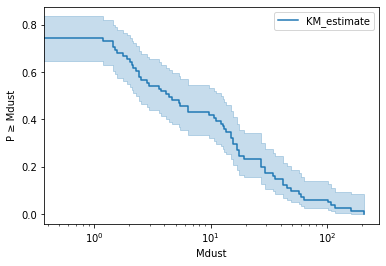

In [13]:
from google.colab import drive #Mounting google drive. Insert confirmation code.
drive.mount('/content/drive')
import pylab as pl
import math
import numpy as np

Detection = np.loadtxt('/content/drive/My Drive/Nodetection')
Masses = np.loadtxt('/content/drive/My Drive/Masses')
Jmag = np.loadtxt('/content/drive/My Drive/Jmag')
print(Detection, len(Detection))

det1=np.empty(81, dtype=int) #Empty array that will contain the detection of the 1st star
mas1=np.empty(81, dtype=object) #Empty array that will contain the mass of the 1st star
jmag1=np.empty(81, dtype=object) #Empty array that will contain the jmag of the 1st star
det2=np.empty(81, dtype=int) #Empty array that will contain the detection of the 2nd star
mas2=np.empty(81, dtype=object) #Empty array that will contain the mass of the 2nd star
jmag2=np.empty(81, dtype=object) #Empty array that will contain the jmag of the 2nd star

for i in range(len(MGM1)):
  det1[i]=Detection[Soda1[i]]
  mas1[i]=Masses[Soda1[i]]
  jmag1[i]=Jmag[Soda1[i]]

print(det1)
print(mas1)
print(jmag1)

for i in range(len(MGM2)):
  det2[i]=Detection[Soda2[i]]
  mas2[i]=Masses[Soda2[i]]
  jmag2[i]=Jmag[Soda2[i]]

print(det2)
print(mas2)
print(jmag2)

primary_masses=np.empty(81, dtype=object)
primary_detection=np.empty(81, dtype=object)
for i in range(0,81):
  if jmag1[i]<=jmag2[i]: #Let's consider the star with the highest magnitude as the secondary star --> high Mag means low Lum
    primary_masses[i]=mas1[i]
    primary_detection[i]=det1[i]
  else:
    primary_masses[i]=mas2[i]
    primary_detection[i]=det2[i]

print(primary_masses)
print(primary_detection)


from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit_left_censoring(primary_masses, primary_detection) 
kmf.survival_function_
kmf.cumulative_density_
fig=kmf.plot_survival_function()
print("Plot for primary stars, i.e. those with Jmag higher")
pl.xlabel('Mdust')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0.9658156357921437 3.0979454105738315 0.9801794311043864
 63.79491772177659 2.5278821636044624 15.059935426702706
 15.580099238260965 0.9519719132052756 6.449627867596323 6.449627867596323
 1.7863831857305599 13.239848124069297 19.27116353966199 4.617859400198515
 5.424475503414426 0.7708175922933349 2.4314900318112733
 2.4314900318112733 27.0497535159207 1.0374195736602074 34.391991067997445
 108.86943063778888 1.4940868458705618 57.918797189726 13.142670252228745
 49.066387893331 16.87791859413922 139.3911005576358 16.755298629549134
 1.558447919817715 0.5769472264965886 1.2011571707143585
 1.1466706551477661 1.1466706551477661 160.31728400461114
 1.4446337417393829 116.38772891236884 2.9455408470775737
 207.24964686575927 0.7999601280037895 102.7001245572579
 10.782901738030223 12.768823878630503 45.70737358209118 59.42161376234495
 9.661177936900902 1.26

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


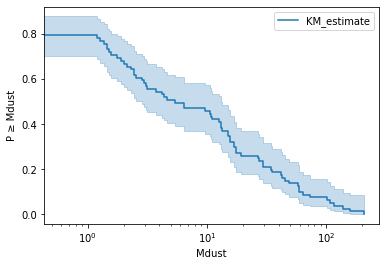

In [14]:
from google.colab import drive #Mounting google drive. Insert confirmation code.
drive.mount('/content/drive')
import pylab as pl
import math
import numpy as np

#In the following arrays I have three information: Jmag, Hmag and Kmag
Mags = np.loadtxt('/content/drive/My Drive/Mags')
#Mags[i][0]=Jmag i-th row, Mags[i][1]=Hmag i-th row, Mags[i][2]=Kmag i-th row
#print(Mags)

#You already have jmag1 and jmag2!
det1=np.empty(81, dtype=int) #Empty array that will contain the detection of the 1st star
mas1=np.empty(81, dtype=object) #Empty array that will contain the mass of the 1st star
hmag1=np.empty(81, dtype=object) #Empty array that will contain the hmag of the 1st star
kmag1=np.empty(81, dtype=object) #Empty array that will contain the kmag of the 1st star
det2=np.empty(81, dtype=int) #Empty array that will contain the detection of the 2nd star
mas2=np.empty(81, dtype=object) #Empty array that will contain the mass of the 2nd star
hmag2=np.empty(81, dtype=object) #Empty array that will contain the hmag of the 2nd star
kmag2=np.empty(81, dtype=object) #Empty array that will contain the kmag of the 1st star

for i in range(len(MGM1)):
  det1[i]=Detection[Soda1[i]]
  mas1[i]=Masses[Soda1[i]]
  hmag1[i]=Mags[Soda1[i]][1]
  kmag1[i]=Mags[Soda1[i]][2]

#print(det1)
#print(mas1)
#print(hmag1)

for i in range(len(MGM2)):
  det2[i]=Detection[Soda2[i]]
  mas2[i]=Masses[Soda2[i]]
  hmag2[i]=Mags[Soda2[i]][1]
  kmag2[i]=Mags[Soda2[i]][2]

#print(hmag2)

first_masses=np.empty(81, dtype=object) #Empty array that will contain the mass of the chosen primary star
first_detection=np.empty(81, dtype=object) #Empty array that will contain the detection/nodetection of the chosen primary star
for i in range(0,81):
  if hmag1[i]<=hmag2[i]: #Let's consider the star with the highest magnitude as the secondary star
    first_masses[i]=mas1[i]
    first_detection[i]=det1[i]
  else:
    first_masses[i]=mas2[i]
    first_detection[i]=det2[i]

print(first_masses)
print(first_detection)


from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit_left_censoring(first_masses, first_detection) 
kmf.survival_function_
kmf.cumulative_density_
fig=kmf.plot_survival_function()
print("Plot for primary stars, i.e. those with Hmag(SODA) lower")
pl.xlabel('Mdust')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cumulative Mass Distribution


/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


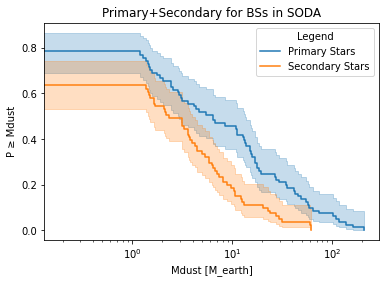

In [28]:
#VOGLIO PRENDERE DAL CATALOGO VISION LE MAGNITUDINI J,K,H E PER LA RICERCA DELLA BINARIA USARE QUESTE TRE GRANDEZZE 
from google.colab import drive #Mounting google drive. Insert confirmation code.
drive.mount('/content/drive')
import pylab as pl
import math
import numpy as np

jmag_v, hmag_v, kmag_v = pl.loadtxt('/content/drive/My Drive/Mags_VISION', unpack = True)
#print(jmag_v, hmag_v, kmag_v)
#print(len(jmag_v))

first_det=np.empty(81, dtype=int) #Empty array that will contain the detection of the 1st star
first_mas=np.empty(81, dtype=object) #Empty array that will contain the mass of the 1st star
first_jmag=np.empty(81, dtype=object) #Empty array that will contain the jmag of the 1st star
first_hmag=np.empty(81, dtype=object) #Empty array that will contain the hmag of the 1st star
first_kmag=np.empty(81, dtype=object) #Empty array that will contain the kmag of the 1st star
second_det=np.empty(81, dtype=int) #Empty array that will contain the detection of the 2nd star
second_mas=np.empty(81, dtype=object) #Empty array that will contain the mass of the 2nd star
second_jmag=np.empty(81, dtype=object) #Empty array that will contain the jmag of the 2nd star
second_hmag=np.empty(81, dtype=object) #Empty array that will contain the hmag of the 2nd star
second_kmag=np.empty(81, dtype=object) #Empty array that will contain the kmag of the 2nd star

for i in range(0,81):
  first_det[i]=Detection[Soda1[i]]
  first_mas[i]=Masses[Soda1[i]]
  first_jmag[i]=jmag_v[Vision1[i]]
  first_hmag[i]=hmag_v[Vision1[i]]
  first_kmag[i]=kmag_v[Vision1[i]]
  second_det[i]=Detection[Soda2[i]]
  second_mas[i]=Masses[Soda2[i]]
  second_jmag[i]=jmag_v[Vision2[i]]
  second_hmag[i]=hmag_v[Vision2[i]]
  second_kmag[i]=kmag_v[Vision2[i]]

#print(first_jmag)
#print(Vision1)
#print(first_det)
#print(first_mas)

#The greater the brightness of the object, the lower its magnitude
#The primary star is the one with the lowest magnitude

MASS1=np.empty(81, dtype=object) #Empty array that will contain the mass of the chosen primary star
DET1=np.empty(81, dtype=object) #Empty array that will contain the detection/nodetection of the chosen primary star
MASS2=np.empty(81, dtype=object) #Empty array that will contain the mass of the chosen secondary star
DET2=np.empty(81, dtype=object) #Empty array that will contain the detection/nodetection of the chosen secondary star
primary_SODA_ind=np.empty(81, dtype=object) #Empty that will contain the SODA index of the PRIMARY star
secondary_SODA_ind=np.empty(81, dtype=object) #Empty that will contain the SODA index of the SECONDARY star
primary_VIS_ind=np.empty(81, dtype=object) #Empty that will contain the VIS index of the PRIMARY star
secondary_VIS_ind=np.empty(81, dtype=object) #Empty that will contain the VIS index of the SECONDARY star
primary_MGM_ind=np.empty(81, dtype=object) #Empty array that will contain the MGM index of the PRIMARY star
secondary_MGM_ind=np.empty(81, dtype=object) #Empty array that will contain the MGM index of the SECONDARY star
for i in range(0,81):
  if first_jmag[i]=='nan': #Let's consider the star with the highest magnitude as the secondary star
    if first_hmag[i]=='nan':
      if first_kmag[i]>second_kmag[i]:
        DET2[i]=first_det[i]
        MASS2[i]=first_mas[i]
        DET1[i]=second_det[i]
        MASS1[i]=second_mas[i]
        primary_SODA_ind[i]=Soda2[i]
        secondary_SODA_ind[i]=Soda1[i]
        primary_VIS_ind[i]=Vision2[i]
        secondary_VIS_ind[i]=Vision1[i]
        primary_MGM_ind[i]=MGM2[i]
        secondary_MGM_ind[i]=MGM1[i]
      else:
        DET2[i]=second_det[i]
        MASS2[i]=second_mas[i]
        DET1[i]=first_det[i]
        MASS1[i]=first_mas[i]
        primary_SODA_ind[i]=Soda1[i]
        secondary_SODA_ind[i]=Soda2[i]
        primary_VIS_ind[i]=Vision1[i]
        secondary_VIS_ind[i]=Vision2[i]
        primary_MGM_ind[i]=MGM1[i]
        secondary_MGM_ind[i]=MGM2[i]
    else:
      if first_hmag[i]>second_hmag[i]:
        DET2[i]=first_det[i]
        MASS2[i]=first_mas[i]
        DET1[i]=second_det[i]
        MASS1[i]=second_mas[i]
        primary_SODA_ind[i]=Soda2[i]
        secondary_SODA_ind[i]=Soda1[i]
        primary_VIS_ind[i]=Vision2[i]
        secondary_VIS_ind[i]=Vision1[i]
        primary_MGM_ind[i]=MGM2[i]
        secondary_MGM_ind[i]=MGM1[i]
      else:
        DET2[i]=second_det[i]
        MASS2[i]=second_mas[i]
        DET1[i]=first_det[i]
        MASS1[i]=first_mas[i]
        primary_SODA_ind[i]=Soda1[i]
        secondary_SODA_ind[i]=Soda2[i]
        primary_VIS_ind[i]=Vision1[i]
        secondary_VIS_ind[i]=Vision2[i]
        primary_MGM_ind[i]=MGM1[i]
        secondary_MGM_ind[i]=MGM2[i]
  else:
    if first_jmag[i]>second_jmag[i]:
        DET2[i]=first_det[i]
        MASS2[i]=first_mas[i]
        DET1[i]=second_det[i]
        MASS1[i]=second_mas[i]
        primary_SODA_ind[i]=Soda2[i]
        secondary_SODA_ind[i]=Soda1[i]
        primary_VIS_ind[i]=Vision2[i]
        secondary_VIS_ind[i]=Vision1[i]
        primary_MGM_ind[i]=MGM2[i]
        secondary_MGM_ind[i]=MGM1[i]
    else:
        DET2[i]=second_det[i]
        MASS2[i]=second_mas[i]
        DET1[i]=first_det[i]
        MASS1[i]=first_mas[i]
        primary_SODA_ind[i]=Soda1[i]
        secondary_SODA_ind[i]=Soda2[i]
        primary_VIS_ind[i]=Vision1[i]
        secondary_VIS_ind[i]=Vision2[i]
        primary_MGM_ind[i]=MGM1[i]
        secondary_MGM_ind[i]=MGM2[i]


#print(MASS)
#print(DET)
#print(first_jmag)
#print(second_jmag)
#print(first_mas)
#print(second_mas)

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf.fit_left_censoring(MASS1, DET1) #Primary Stars
kmf2.fit_left_censoring(MASS2, DET2) #Secondary Stars
kmf.survival_function_
kmf.cumulative_density_
fig = plt.figure()
ax = fig.add_subplot(111)
kmf.plot_survival_function(ax=ax)
kmf2.plot_survival_function(ax=ax)
print("Cumulative Mass Distribution")
pl.xlabel('Mdust [M_earth]')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')
legend = plt.legend(['Primary Stars','Secondary Stars'], title = "Legend")
plt.title("Primary+Secondary for BSs in SODA")
plt.savefig('Soda_Binaries.png')

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Cumulative Distribution


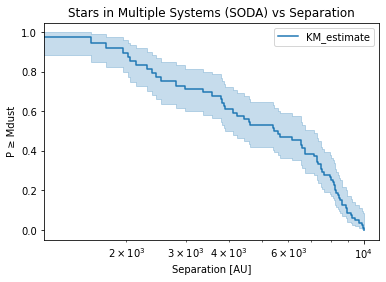

In [30]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit_left_censoring(Position, DET1) #Primary Stars
kmf.survival_function_
kmf.cumulative_density_
fig = plt.figure()
ax = fig.add_subplot(111)
kmf.plot_survival_function(ax=ax)
print("Cumulative Distribution")
pl.xlabel('Separation [AU]')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')
#x=np.linspace(1e3,1e4,1000)
#legend = plt.legend(['Primary Stars','Secondary Stars'], title = "Legend")
plt.title("Stars in Multiple Systems (SODA) vs Separation")
plt.savefig('Multiple_vs_Separation.png')

In [17]:
#Creiamo un array contenente gli indici in SODA delle stelle rimaste singole 
init_soda_ind = np.linspace(0,881, num=882, dtype=int)
single_det, single_Mass = pl.loadtxt('/content/drive/My Drive/mass_Imass_single_soda', unpack = True)

del_ind_soda = [] #Empty list that will contain the indices of the stars in the multiple systems 
ind_single_soda = [] #Empty list that will contain the indices of the single star in SODA

for i in range(len(init_soda_ind)):
  if (i in Soda1)==True or (i in Soda2)==True:
    del_ind_soda.append(i)

print(del_ind_soda)
print(len(del_ind_soda))

ind_single_soda = np.delete(init_soda_ind, del_ind_soda)
sin_Mass = np.delete(single_Mass, del_ind_soda)
sin_det = np.delete(single_det, del_ind_soda)
print(len(ind_single_soda))

[3, 4, 5, 7, 9, 10, 13, 16, 23, 24, 33, 34, 42, 43, 52, 53, 66, 68, 69, 70, 71, 72, 73, 120, 121, 133, 134, 144, 145, 148, 149, 162, 163, 164, 165, 169, 170, 186, 187, 188, 191, 192, 194, 195, 197, 199, 200, 213, 214, 245, 247, 269, 272, 275, 276, 286, 287, 298, 300, 302, 303, 304, 312, 313, 328, 329, 330, 331, 334, 335, 341, 342, 352, 355, 371, 373, 376, 377, 378, 381, 382, 411, 414, 427, 429, 431, 433, 436, 438, 443, 444, 451, 455, 462, 463, 464, 465, 466, 467, 496, 498, 512, 515, 520, 522, 524, 525, 545, 546, 547, 554, 556, 558, 561, 562, 566, 569, 570, 571, 607, 609, 622, 623, 624, 660, 662, 673, 676, 714, 717, 718, 721, 726, 727, 728, 731, 734, 737, 742, 756, 762, 786, 787, 853, 854, 874, 875, 876]
148
734


Cumulative Distribution


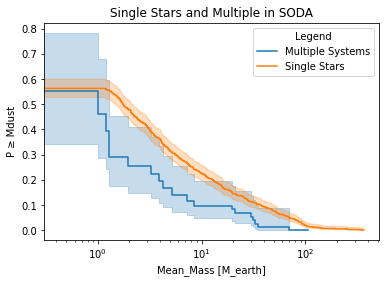

In [31]:
from pandas.core.dtypes.cast import ensure_int16
e_Mass = pl.loadtxt('/content/drive/My Drive/error_masses', unpack = True)
#print(len(e_Mass))
e_1 = np.zeros(81, dtype=float)
e_2 = np.zeros(81, dtype=float)

for i in range(0,81):
  e_1[i]=e_Mass[Soda1[i]]
  e_2[i]=e_Mass[Soda2[i]]


Mean_Mass = []
det_mean_mass = []
error = []
for i in range(len(MASS1)):
  Mean_Mass.append((MASS1[i]+MASS2[i])/2)
  error.append(e_1[i]+e_2[i])
  if error[i]<1:
    det_mean_mass.append(0)
  else:
    det_mean_mass.append(1)

Mean_Mass = np.array(Mean_Mass)
det_mean_mass = np.array(det_mean_mass)
#print(MASS1)
#print(MASS2)
#print(error)

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf.fit_left_censoring(Mean_Mass, det_mean_mass) #Multiple Systems
kmf2.fit_left_censoring(sin_Mass, sin_det) #Single Stars
kmf.survival_function_
kmf.cumulative_density_
fig = plt.figure()
ax = fig.add_subplot(111)
kmf.plot_survival_function(ax=ax)
kmf2.plot_survival_function(ax=ax)
print("Cumulative Distribution")
pl.xlabel('Mean_Mass [M_earth]')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')
legend = plt.legend(['Multiple Systems','Single Stars'], title = "Legend")
plt.title("Single Stars and Multiple in SODA")
plt.savefig('Soda_Multiple+Single.png')

Cumulative Distribution


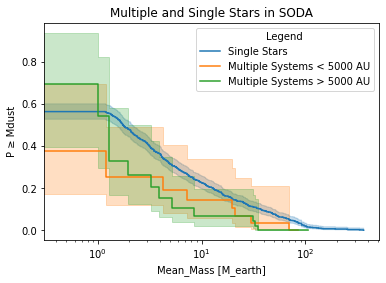

In [32]:
mult_close = [] #Empty list that will contain the Mean Mass of the multiple systems with a separation < 5000AU
det_close = []
mult_wild = [] #Empty list that will contain the Mean Mass of the multiple systems with a separation > 5000AU
det_wild = []

for i in range(len(Position)):
  if Position[i]<5000:
    mult_close.append(Mean_Mass[i])
    det_close.append(det_mean_mass[i])
  else:
    mult_wild.append(Mean_Mass[i])
    det_wild.append(det_mean_mass[i])

#print(len(mult_close))
#print(len(mult_wild))


from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()
kmf.fit_left_censoring(sin_Mass, sin_det) #Single Stars
kmf2.fit_left_censoring(mult_close, det_close) #Multiple Systems < 5000 AU
kmf3.fit_left_censoring(mult_wild, det_wild) #Multiple Systems > 5000 AU
kmf.survival_function_
kmf.cumulative_density_
fig = plt.figure()
ax = fig.add_subplot(111)
kmf.plot_survival_function(ax=ax)
kmf2.plot_survival_function(ax=ax)
kmf3.plot_survival_function(ax=ax)
print("Cumulative Distribution")
pl.xlabel('Mean_Mass [M_earth]')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')
legend = plt.legend(['Single Stars', 'Multiple Systems < 5000 AU', 'Multiple Systems > 5000 AU'], title = "Legend")
plt.title("Multiple and Single Stars in SODA")
plt.savefig('Soda_Stars_Separationdivition.png')

Cumulative Distribution


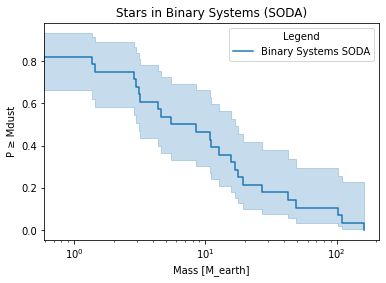

In [64]:
#Plots for systems that are contained in the SODA list and in the statistical correction list 

# Plot 1: Binary systems whose components are both in SODA
MGM_primary = [55, 994, 1068, 802, 704, 568, 363, 143, 175, 230, 378, 159, 203, 241, 7, 864, 734, 596, 411, 66, 261, 847, 468, 476, 477, 194, 171, 408]

detection = []
mass = []
for i in range(len(MGM_primary)):
  for j in range(len(primary_MGM_ind)):
    if MGM_primary[i]==primary_MGM_ind[j]:
      detection.append(DET1[j])
      mass.append(MASS1[j])

detection_new = np.delete(detection, 3)
mass_new = np.delete(mass, 3)

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit_left_censoring(mass_new, detection_new) #Primary Stars
kmf.survival_function_
kmf.cumulative_density_
fig = plt.figure()
ax = fig.add_subplot(111)
kmf.plot_survival_function(ax=ax)
print("Cumulative Distribution")
pl.xlabel('Mass [M_earth]')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')
#x=np.linspace(1e3,1e4,1000)
legend = plt.legend(['Binary Systems SODA'], title = "Legend")
plt.title("Stars in Binary Systems (SODA)")
plt.savefig('BSs_SODA_Stat.png')

Cumulative Distribution


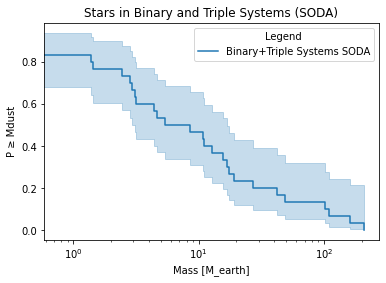

In [73]:
#Plot 2: Binary+Triple in SODA
MGM_primary_1 = [55, 994, 1068, 802, 704, 568, 363, 143, 175, 230, 378, 159, 203, 241, 7, 864, 734, 596, 411, 66, 261, 847, 468, 476, 477, 194, 171, 408, 421, 192]

detection_1 = []
mass_1 = []
for i in range(len(MGM_primary_1)):
  for j in range(len(primary_MGM_ind)):
    if MGM_primary_1[i]==primary_MGM_ind[j]:
      detection_1.append(DET1[j])
      mass_1.append(MASS1[j])

del_idx = [3, 31]
detection_new_1 = np.delete(detection_1, del_idx)
mass_new_1 = np.delete(mass_1, del_idx)


from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit_left_censoring(mass_new_1, detection_new_1) 
kmf.survival_function_
kmf.cumulative_density_
fig = plt.figure()
ax = fig.add_subplot(111)
kmf.plot_survival_function(ax=ax)
print("Cumulative Distribution")
pl.xlabel('Mass [M_earth]')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')
#x=np.linspace(1e3,1e4,1000)
legend = plt.legend(['Binary+Triple Systems SODA'], title = "Legend")
plt.title("Stars in Binary and Triple Systems (SODA)")
plt.savefig('BSs_TSs_SODA_Stat.png')

Cumulative Distribution


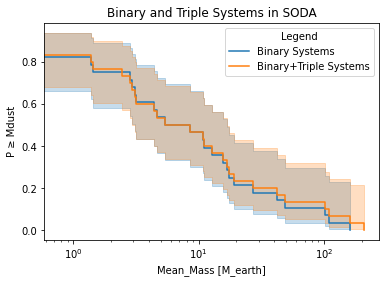

In [74]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf.fit_left_censoring(mass_new, detection_new) 
kmf2.fit_left_censoring(mass_new_1, detection_new_1) 
kmf.survival_function_
kmf.cumulative_density_
fig = plt.figure()
ax = fig.add_subplot(111)
kmf.plot_survival_function(ax=ax)
kmf2.plot_survival_function(ax=ax)
print("Cumulative Distribution")
pl.xlabel('Mean_Mass [M_earth]')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')
legend = plt.legend(['Binary Systems','Binary+Triple Systems'], title = "Legend")
plt.title("Binary and Triple Systems in SODA")
plt.savefig('Soda_Binary+Triple.png')

In [20]:
#Same as Table m, but now Star1==PRIMARY_STAR and Star2==SECONDARY_STAR

print("Table containing only binary systems for which both stars are in Soda + MGM2012 Index")
print("Now Star1 corresponds to the Primary star while Star2 corresponds to the Secondary star")
b = Table()
b['Primary Star index in SODA']=np.empty(81, dtype=object)
b['Primary Star index in VISION']=np.empty(81, dtype=object)
b['Primary Star index in MGM2012']=np.empty(81, dtype=object)
b['Secondary Star index in SODA']=np.empty(81, dtype=object)
b['Secondary Star index in VISION']=np.empty(81, dtype=object)
b['Secondary Star index in MGM2012']=np.empty(81, dtype=object)
b['Separation [AU]']=np.empty(81, dtype=object)
for i in range(0,81):
  b['Primary Star index in SODA'][i]=primary_SODA_ind[i]+1 #I add 1 so I have the correct index in the Soda catalogue
  b['Primary Star index in VISION'][i]=primary_VIS_ind[i]
  b['Primary Star index in MGM2012'][i]=primary_MGM_ind[i]
  b['Secondary Star index in SODA'][i]=secondary_SODA_ind[i]+1
  b['Secondary Star index in VISION'][i]=secondary_VIS_ind[i]
  b['Secondary Star index in MGM2012'][i]=secondary_MGM_ind[i]
  b['Separation [AU]'][i]=Position[i]
print(b)
#b.write('Binary_systems_entirely_in_Soda+MGM2012_RIGHTPRIMARY&SECONDARY', format='ascii.ecsv')


Table containing only binary systems for which both stars are in Soda + MGM2012 Index
Now Star1 corresponds to the Primary star while Star2 corresponds to the Secondary star
Primary Star index in SODA Primary Star index in VISION ...  Separation [AU]  
-------------------------- ---------------------------- ... ------------------
                         8                         2930 ...  7922.414727488535
                         5                         3054 ... 1744.1437636325243
                        11                         3022 ...  4633.780093923772
                        14                         2893 ...  5682.082128473779
                        25                         2866 ...  8166.980869346285
                        35                         2926 ...  7966.492854086459
                        43                         2683 ... 2536.6044914247277
                        53                         3066 ...  7054.206706382186
                        69          

<class 'list'>
(95, 7) <class 'list'> 95
[ 2.0240e+01  4.3400e+00 -1.6000e-01  0.0000e+00  8.0000e-02  4.1800e+00
  1.4000e+01  4.4880e+01  5.4400e+00  4.6760e+01  3.7500e+00  7.3300e+00
  5.5400e+00  2.3060e+01  3.1800e+00  1.2800e+00  2.8700e+00  1.5890e+01
  1.3862e+02  1.1285e+02  8.5400e+00  5.1320e+01  3.7000e-01  5.8230e+01
  6.6000e-01  3.3780e+01  2.8000e-01  1.3300e+00  4.5380e+01  2.2800e+00
  1.4710e+01  2.3440e+01  1.8270e+01  4.4700e+00  1.4000e-01  1.1800e+00
  4.1800e+01  1.0510e+01  1.1440e+01  6.6000e-01  2.1600e+00  5.9000e-01
  1.4800e+00 -5.0000e-02  1.7100e+00  4.0900e+00  2.3700e+00  1.2424e+02
 -2.8000e-01  2.6100e+01  0.0000e+00  7.4500e+00  5.7200e+00  4.6590e+01
  1.2900e+00 -1.9000e-01  2.7680e+01  2.1638e+02  8.5000e-01  1.4280e+01
  8.3000e-01  4.2000e-01  8.8600e+00  9.5900e+00  1.2500e+00  7.2470e+01
  8.5000e-01  1.7400e+00  1.2570e+01  1.0000e-02  0.0000e+00  6.6500e+00
  4.9830e+01 -2.4000e-01  1.0000e-01 -6.0000e-02  1.0000e-02  2.1200e+00
 -2.9000e-

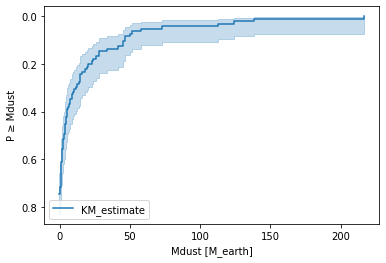

In [21]:
#We want to compare the results obtained for our sample with what Zurlo obtained for Lupus

#CASE 1 --> Complete Sample: 95 class II sources that were observed with ALMA
#Table1: _RAJ2000, _DECJ2000, SOURCE_NAME, dist, Mdust, e_Mdust, I_F13CO(=limit flag on F13CO, same as I_Mgas i.e. limit falg on Mgas)

Data_Ans=[] #Information we need for the 95 Class II sources observed with ALMA 
print(type(Data_Ans))
file_ans= open('/content/drive/My Drive/Andsell_2018_CompleteSample', 'r') #reading out the data set
for i, line in enumerate(file_ans.readlines()):
    if i==0: 
        continue
    line = line.split()
    line[0]=float(line[0])
    line[1]=float(line[1])
    line[2]=str(line[2])
    line[3]=float(line[3])
    line[4]=float(line[4])
    line[5]=float(line[5])
    line[6]=float(line[6])
    Data_Ans.append(line[0:7])
    file_ans.close()

print(np.shape(Data_Ans), type(Data_Ans), len(Data_Ans))
#Data_Ans[i] indicates the i-th lines(i.e. the i-th arrays which contains 6 information), Data_Ans[i][j] indicates the j-th element of the i-th line
Data_Ans=np.array(Data_Ans)

#Disk Mass Distribution for the whole sample (95 objects)
Mass_Ans=np.zeros(95, dtype=float) #Empty array that will contain the DUST MASS of the sources in the cataloug Ansdell
eMass_Ans=np.zeros(95, dtype=float) #Empty array that will contain the ERROR on the DUST MASS of the sources in the cataloug Ansdell
for i in range(len(Data_Ans)):
  Mass_Ans[i]=Data_Ans[i][4]
  eMass_Ans[i]=Data_Ans[i][5]

#Let's compute SIGMA
print(Mass_Ans)
print(eMass_Ans)

#I need the limit of Mdust. In Ansdell cataloug there isn't a column for that. I have to create the "detection array"
#I know the values Mdust and eMdust, if Mdust - eMdust > 3sigma --> DETECTION (=1), otherwise NO DETECTION (=0)

Det_Ans=np.zeros(95, dtype=int) #Empty array that will contain Det/NODet of our Sample
for i in range(len(Mass_Ans)):
  if (Mass_Ans[i]/eMass_Ans[i])>3:
    Det_Ans[i]=1
  else:
    Det_Ans[i]=0

print(Det_Ans)

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit_left_censoring(Mass_Ans, Det_Ans) 
kmf.survival_function_
kmf.cumulative_density_
fig=kmf.plot_survival_function()
print("Cumulative distribution of the complete sample (Ansdell catalogue)")
pl.xlabel('Mdust [M_earth]')
pl.ylabel('P ≥ Mdust')
fig.invert_yaxis()
#pl.xscale('log')

[44.88  5.54  2.87 27.68]
[1 1 1 1]
Cumulative distribution of the Primary Stars (Ansdell catalogue)


Text(0, 0.5, 'P ≥ Mdust')

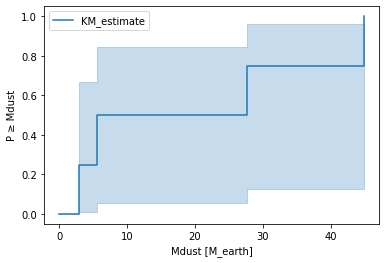

In [22]:
#Let's consider Primary and Secondary
#PRIMARY STARS (ANSDELL)
Primary_Ans=['Sz68', 'Sz74','Sz81A', 'V856Sco']
Primary_Mass_Ans=np.zeros(4, dtype=float)
Primary_Det_Ans=np.zeros(4, dtype=int)
for i in range(len(Primary_Ans)):
  for j in range(len(Data_Ans)):
    if Primary_Ans[i]==Data_Ans[j][2]:
      Primary_Mass_Ans[i]=Mass_Ans[j]
      Primary_Det_Ans[i]=Det_Ans[j]

print(Primary_Mass_Ans)
print(Primary_Det_Ans)

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit_left_censoring(Primary_Mass_Ans, Primary_Det_Ans) 
kmf.survival_function_
kmf.cumulative_density_
#fig=kmf.plot_survival_function()
fig=kmf.plot_cumulative_density()
print("Cumulative distribution of the Primary Stars (Ansdell catalogue)")
pl.xlabel('Mdust [M_earth]')
pl.ylabel('P ≥ Mdust')
#fig.invert_yaxis()
#pl.xscale('log') 

Cumulative distribution of the Secondary Stars (Ansdell catalogue)


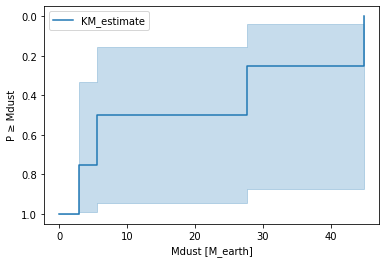

In [23]:
#SECONDARY STARS (ANSDELL)
Secondary_Ans=['Sz68', 'Sz74', 'Sz81A', 'V856Sco']
Secondary_Mass_Ans=np.zeros(4, dtype=float)
Secondary_Det_Ans=np.zeros(4, dtype=int)
for i in range(len(Secondary_Ans)):
  for j in range(len(Data_Ans)):
    if Secondary_Ans[i]==Data_Ans[j][2]:
      Secondary_Mass_Ans[i]=Mass_Ans[j]
      Secondary_Det_Ans[i]=Det_Ans[j]


from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit_left_censoring(Secondary_Mass_Ans, Secondary_Det_Ans) 
kmf.survival_function_
kmf.cumulative_density_
fig=kmf.plot_survival_function()
print("Cumulative distribution of the Secondary Stars (Ansdell catalogue)")
pl.xlabel('Mdust [M_earth]')
pl.ylabel('P ≥ Mdust')
fig.invert_yaxis()
#pl.xscale('log') 

Cumulative Mass Distribution


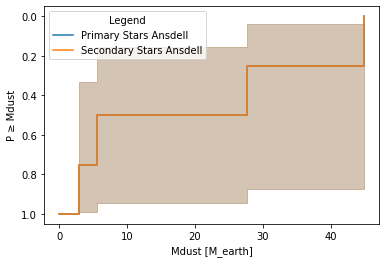

In [24]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf.fit_left_censoring(Primary_Mass_Ans, Primary_Det_Ans) #Primary Stars Ansdell
kmf2.fit_left_censoring(Secondary_Mass_Ans, Secondary_Det_Ans) #Secondary Stars Ansdell
kmf.survival_function_
kmf.cumulative_density_
fig = plt.figure()
ax = fig.add_subplot(111)
kmf.plot_survival_function(ax=ax)
kmf2.plot_survival_function(ax=ax)
ax.invert_yaxis()
print("Cumulative Mass Distribution")
pl.xlabel('Mdust [M_earth]')
pl.ylabel('P ≥ Mdust')
#pl.xscale('log')
legend = plt.legend(['Primary Stars Ansdell','Secondary Stars Ansdell'], title = "Legend")

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Cumulative Mass Distribution


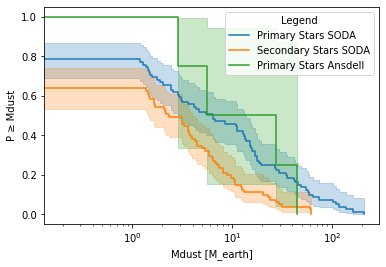

In [25]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()
kmf.fit_left_censoring(MASS1, DET1) #Primary Stars SODA
kmf2.fit_left_censoring(MASS2, DET2) #Secondary Stars SODA
kmf3.fit_left_censoring(Primary_Mass_Ans, Primary_Det_Ans) #Primary Stars in Ansdell catalogue
kmf.survival_function_
kmf.cumulative_density_
fig = plt.figure()
ax = fig.add_subplot(111)
kmf.plot_survival_function(ax=ax)
kmf2.plot_survival_function(ax=ax)
kmf3.plot_survival_function(ax=ax)
print("Cumulative Mass Distribution")
pl.xlabel('Mdust [M_earth]')
pl.ylabel('P ≥ Mdust')
pl.xscale('log')
legend = plt.legend(['Primary Stars SODA','Secondary Stars SODA','Primary Stars Ansdell'], title = "Legend")